<a href="https://colab.research.google.com/github/KaviyaThangadurai/ChennaiHousePricePrediction/blob/main/ChennaiHousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chennai House Price Prediction

This kernel analyses the House Sales Price data of Houses in Chennai and is used to predict the price range of a house in Chennai based on various features.


We first import the necessary Libraries.

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


The data is first uploaded to Github for ease of access and the raw format of the csv file is imported to create the DataFrame.

Data Description:
AREA- The region in which the house is built in Chennai. Categorical Nominal Data. <br>
INT_SQFT - The built area/space occupied by the house. <br>
DATE_SALE - Date on which the house was sold. <br>
DIST_MAINROAD - Distance of the house from the nearest mainroad. <br>
N_BEDROOM - Number of Bedrooms in the House. <br>
N_BATHROOM - Number of bathrooms in the house. <br>
N_ROOM - Number of rooms in the house. <br>
SALE_COND - Type of sale, if the sale was partial/AbNormal/Family <br>
PARK_FACIL - Binary Categorical Feature if the house has Parking Facility. <br>
DATE_BUILD - Date on which the hous was built. <br>
BUILDTYPE - Type of construction of the building. House/Commercial/Other. Nominal Categorical data. <br> 
UTILITY_AVAIL - Categorical data describing the availability of Utility such as Sewer. <br>
STREET - Categorical feature with information about the type of street outside the house. <br>
MZZONE - Categorical Data classifying the location of the house into various City Zones such as Agricultural/Residintial/ etc. <br>
QS_ROOMS/ QS_BATHROOM/ QS_BEDROOM/ QS_OVERALL - Numeric features that are some kind of a metric collected about the house. <br>
REG_FEE - Registration Fee
COMMIS - Commission Fee
SALES_PRICE - Target Vector - Sale Price of the house

In [5]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("https://raw.githubusercontent.com/KaviyaThangadurai/ChennaiHousePricePrediction/main/train-chennai-sale.csv",index_col="PRT_ID")
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
PRT_ID,,,,,,,,,,,,,,,,,,,,,
P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#Observation

We observe the datatypes and non-null values in a feature. We find that some data is missing which have to be imputed. <br>
DATE_SALE, DATE_BUILD need to be converted to the datetime format. <br> 
All Categorical variables have to be sutably encoded.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7109 entries, P03210 to P09794
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FE

We observe the distribution of the numeric features.

In [7]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


Quantizing the number of null values

In [8]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

To impute the null bedroom value we find the average area of the house (INT_SQFT) for various bedroom values. <br>
We find that the area of the house is nearest to a 2bhk house. Hence we fill it with 2.

In [9]:
print(df.loc[df['N_BEDROOM'].isnull(),'INT_SQFT'])
print('\n Lets find the average area for different bhk')
print(df[['N_BEDROOM','INT_SQFT']].groupby('N_BEDROOM').mean())
print(" It is close to 2bhk")
df['N_BEDROOM'].fillna(2,inplace=True)

PRT_ID
P01066    1556
Name: INT_SQFT, dtype: int64

 Lets find the average area for different bhk
              INT_SQFT
N_BEDROOM             
1.0        1078.015283
2.0        1596.548044
3.0        1947.609618
4.0        2364.141732
 It is close to 2bhk


We use a similar approach for null bathroom values. We fill the number of bathrooms as 1 as most of the null value rows are 1bhk.

In [10]:
df[df['N_BATHROOM'].isnull()]
print(df[['N_BEDROOM','N_BATHROOM']].groupby('N_BEDROOM').mean())
print(df.loc[df['N_BEDROOM']==1,'N_BATHROOM'].isnull().sum())
df['N_BATHROOM'].fillna(1,inplace=True)

           N_BATHROOM
N_BEDROOM            
1.0          1.000000
2.0          1.235544
3.0          2.000000
4.0          2.000000
4


We find that the average of QS_OVERALL for all bhk houses are close to 3.5, so we impute it with the same.

In [11]:
df[df['QS_OVERALL'].isnull()]
print(df[['N_BEDROOM','QS_OVERALL']].groupby('N_BEDROOM').mean())
df['QS_OVERALL'].fillna(3.5,inplace=True)

           QS_OVERALL
N_BEDROOM            
1.0          3.495865
2.0          3.512220
3.0          3.502646
4.0          3.532688


In [12]:
df[df.duplicated()]
print("No Duplicate Values")

No Duplicate Values


#Data Correction

Many of the Categorical columns have spelling mistakes which need to be corrected <br> 

The AREA feature has <b>7</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [13]:
df['AREA'].value_counts()
df['AREA'].replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet',inplace=True)
df['AREA'].replace(to_replace=['TNagar'],value='T Nagar',inplace=True)
df['AREA'].replace(to_replace=['Karapakam'],value='Karapakkam',inplace=True)
df['AREA'].replace(to_replace=['Ana Nagar','Ann Nagar'],value='Anna Nagar',inplace=True)
df['AREA'].replace(to_replace=['Velchery'],value='Velachery',inplace=True)
df['AREA'].replace(to_replace=['Adyr'],value='Adyar',inplace=True)
df['AREA'].replace(to_replace=['KKNagar'],value='KK Nagar',inplace=True)

The SALE_COND feature has <b>5</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [14]:
df['SALE_COND'].value_counts()
df['SALE_COND'].replace(to_replace=['Partiall','PartiaLl'],value='Partial',inplace=True)
df['SALE_COND'].replace(to_replace=['Adj Land'],value='AdjLand',inplace=True)
df['SALE_COND'].replace(to_replace=['Ab Normal'],value='AbNormal',inplace=True)

The PARK_FACIL feature has <b>2</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [15]:
df['PARK_FACIL'].value_counts()
df['PARK_FACIL'].replace(to_replace=['Noo'],value='No',inplace=True)

The BUILD_TYPE feature has <b>3</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [16]:
df['BUILDTYPE'].value_counts()
df['BUILDTYPE'].replace(to_replace=['Comercial'],value='Commercial',inplace=True)
df['BUILDTYPE'].replace(to_replace=['Other'],value='Others',inplace=True)

The UTILITY_AVAIL feature has <b>3</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [17]:
df['UTILITY_AVAIL'].value_counts()
df['UTILITY_AVAIL'].replace(to_replace=['All Pub'],value='AllPub',inplace=True)
df['UTILITY_AVAIL'].replace(to_replace=['NoSeWa','NoSewr '],value='NoSewr',inplace=True)

The STREET feature has <b>3</b> proper categorical values. Some values are typographical mistakes of the same value which need to be corrected.

In [18]:
df['STREET'].value_counts()
df['STREET'].replace(to_replace=['Pavd'],value='Paved',inplace=True)
df['STREET'].replace(to_replace=['NoAccess'],value='No Access',inplace=True)

# Data Type correction
We need to correct the data type of DATE_SALE and DATE_BUILD to datetime format. We take only the year of Sale in order to fit it to our model.<br>
The N_BEDROOM and N_BATHROOM features need to be changed to int.

In [19]:
df['DATE_BUILD']=df['DATE_BUILD'].astype('datetime64')
df['DATE_SALE']=df['DATE_SALE'].astype('datetime64')
df['DATE_BUILD'] = df['DATE_BUILD'].dt.year
df['DATE_SALE'] = df['DATE_SALE'].dt.year
df['N_BEDROOM']=df['N_BEDROOM'].astype('int64')
df['N_BATHROOM']=df['N_BATHROOM'].astype('int64')

# Derived Feature - Age

We get the Age of a house by subtracting the DATE_BUILD from DATE_SALE

In [20]:
df['AGE']=df['DATE_SALE']-df['DATE_BUILD']

The REG_FEES and COMMIS columns are not necessary as they are derived from the Sales price and don't affect it.

#EDA

We now plot various plots between every Feature and the sale price and also observe the distribution of the data.

We first plot a graph between the Area and average Sales price. 
We observe that AREA is linearly related with SALES_PRICE.

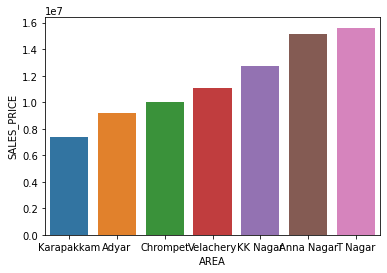

In [21]:
import seaborn as sns

areaVSsale=df[['AREA','SALES_PRICE']].groupby('AREA').mean().reset_index().sort_values('SALES_PRICE')
areaVSsale
sns.barplot(x='AREA',y='SALES_PRICE',data=areaVSsale)

Hence we perform label encoding to fit it to the Regression Model.

In [22]:
area_val={'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}
df['AREA']=df['AREA'].map(area_val)

We plot a graph between the Sale condition and average Sales price. We observe that SALE_COND is not much related with SALES_PRICE as we don't observe much change in average SALES_PRICE . We drop this column and don't consider it for our Regression model.

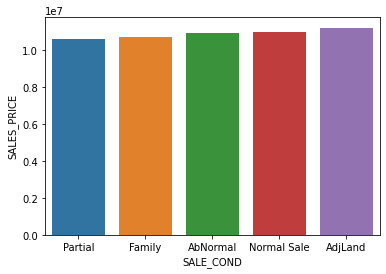

In [23]:
scondVSsale=df[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().reset_index().sort_values('SALES_PRICE')
scondVSsale
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=scondVSsale)
df.drop('SALE_COND',axis=1,inplace=True)

We plot a graph between the and average Sales price. We observe that PARK_FACIL is related with SALES_PRICE.

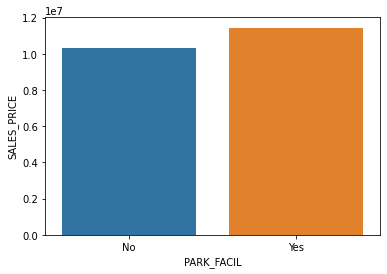

In [24]:
parkVSsale=df[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().reset_index().sort_values('SALES_PRICE')
scondVSsale
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=parkVSsale)

Hence we perform label encoding to fit it to the Regression Model.

In [25]:
park_val={'No':0,'Yes':1}
df['PARK_FACIL']=df['PARK_FACIL'].map(park_val)

We plot a graph between the BUILDTYPE and average Sales price. We observe that BUILDTYPE is related with SALES_PRICE but not linearly.

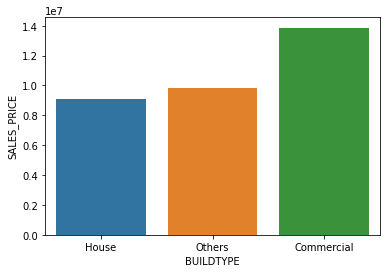

In [26]:
buildTypeVSsale=df[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().reset_index().sort_values('SALES_PRICE')
buildTypeVSsale
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=buildTypeVSsale)

Hence we perform One-hot encoding to fit it to the Regression Model.

In [27]:
df=pd.get_dummies(df,columns=['BUILDTYPE'])
df.drop(columns=['BUILDTYPE_Others'],axis=1,inplace=True)

We plot a graph between the Utility available and average Sales price. We observe that UTILITY_AVAIL is linearly related with SALES_PRICE.

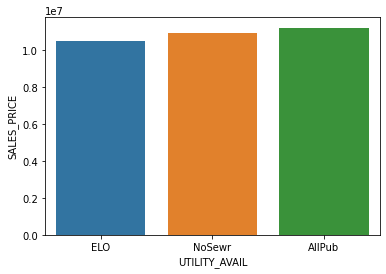

In [28]:
utilVSsale=df[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().reset_index().sort_values('SALES_PRICE')
utilVSsale
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=utilVSsale)

Hence we perform label encoding to fit it to the Regression Model.

In [29]:
util_val={'ELO':0,'NoSewr':1,'AllPub':2}
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map(util_val)

We plot a graph between the Street and average Sales price. We observe that STREET is linearly related with SALES_PRICE.

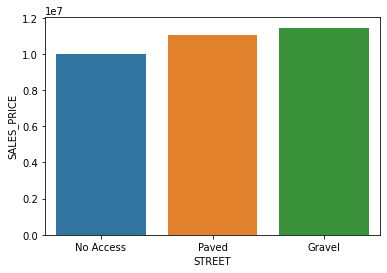

In [30]:
streetVSsale=df[['STREET','SALES_PRICE']].groupby('STREET').mean().reset_index().sort_values('SALES_PRICE')
streetVSsale
sns.barplot(x='STREET',y='SALES_PRICE',data=streetVSsale)

Hence we perform label encoding to fit it to the Regression Model.

In [31]:
street_val={'No Access':0,'Paved':1,'Gravel':2}
df['STREET']=df['STREET'].map(street_val)

We plot a graph between the Zone and average Sales price. <br> We observe that MZZONE is piece-wise linearly related with SALES_PRICE.

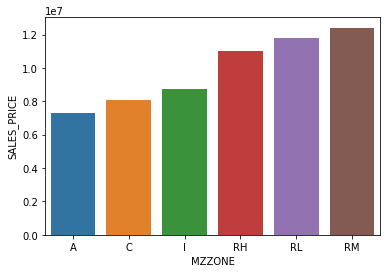

In [32]:
mzzoneVSsale=df[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().reset_index().sort_values('SALES_PRICE')
mzzoneVSsale
sns.barplot(x='MZZONE',y='SALES_PRICE',data=mzzoneVSsale)

Hence we perform label encoding with one step between I and RH to fit it to the Regression Model.

In [33]:
mzzone_val={'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6}
df['MZZONE']=df['MZZONE'].map(mzzone_val)

In [34]:
df.drop(columns=['REG_FEE','COMMIS'],axis=1,inplace=True)
sale_price=df['SALES_PRICE']
df.drop(columns=['SALES_PRICE'],axis=1,inplace=True)
df['SALES_PRICE']=sale_price
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7109 entries, P03210 to P09794
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DATE_SALE             7109 non-null   int64  
 3   DIST_MAINROAD         7109 non-null   int64  
 4   N_BEDROOM             7109 non-null   int64  
 5   N_BATHROOM            7109 non-null   int64  
 6   N_ROOM                7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   DATE_BUILD            7109 non-null   int64  
 9   UTILITY_AVAIL         7109 non-null   int64  
 10  STREET                7109 non-null   int64  
 11  MZZONE                7109 non-null   int64  
 12  QS_ROOMS              7109 non-null   float64
 13  QS_BATHROOM           7109 non-null   float64
 14  QS_BEDROOM            7109 non-null   float64
 15  QS_OVERALL         

#Outliers

We plot boxplot of Numerical features to identify outliers. <br>
We observe that there are no significant outliers in the features and the outliers in the target are to be considered for the model as they are real values.

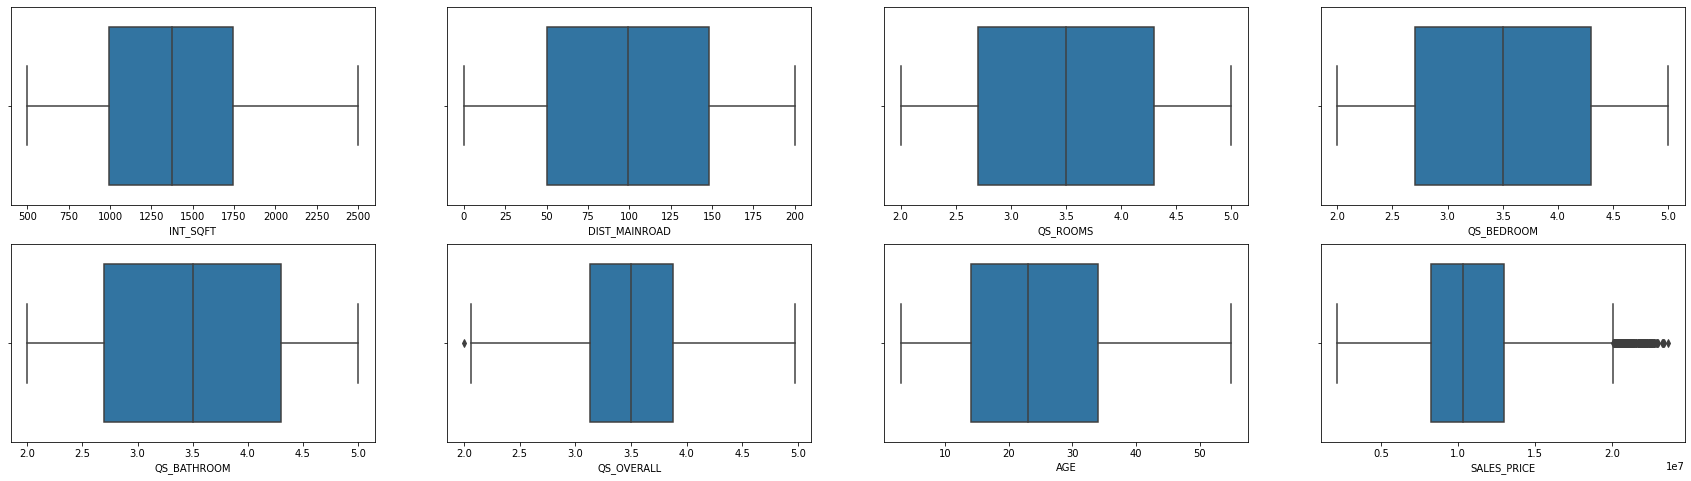

In [35]:
import seaborn as sns

fig, axs = plt.subplots(2,4,figsize=(30,8))

columnsN = ['INT_SQFT','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','AGE','SALES_PRICE']

for col, ax in zip(columnsN,axs.flatten()):
  sns.boxplot(x=df[col], ax=ax)

We plot a scatter matrix to observe patterns in the features. We observe some relation of some numeric features

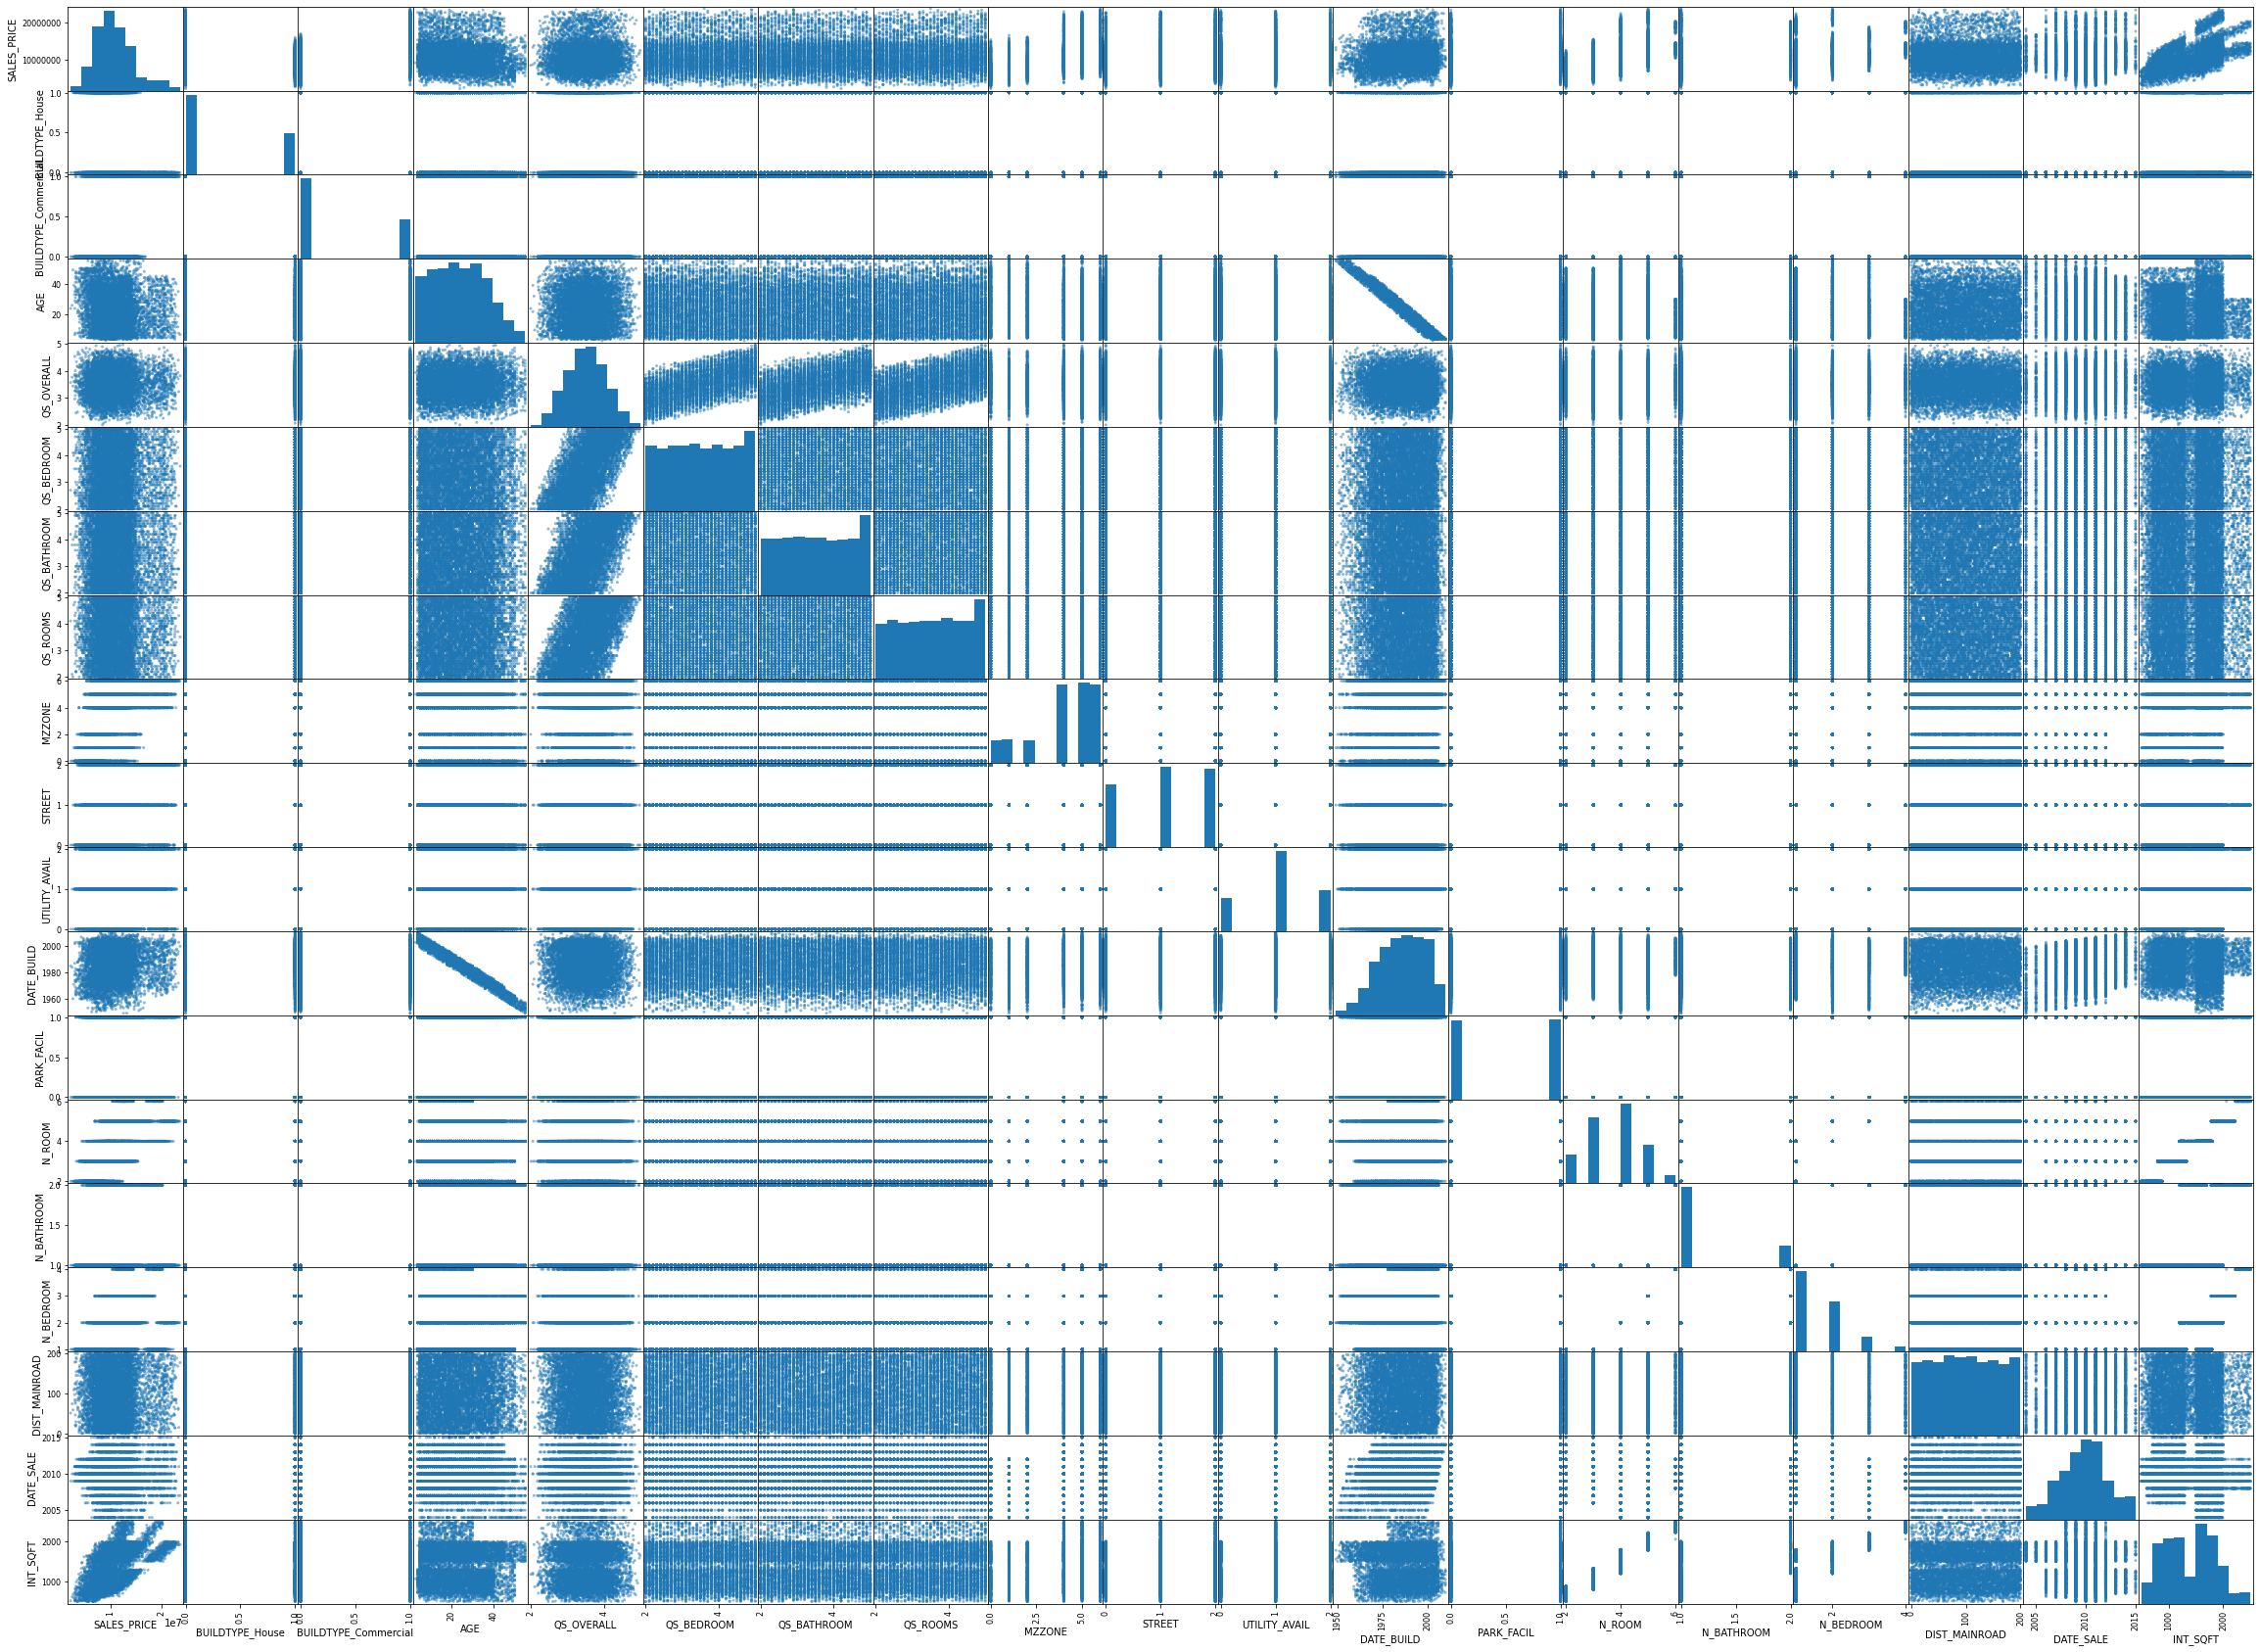

In [36]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,-1:0:-1],figsize=(40,30))
plt.show()

We plot the regplot of some numeric features and identify that INT_SQFT, AGE, DATE_BUILD are related.

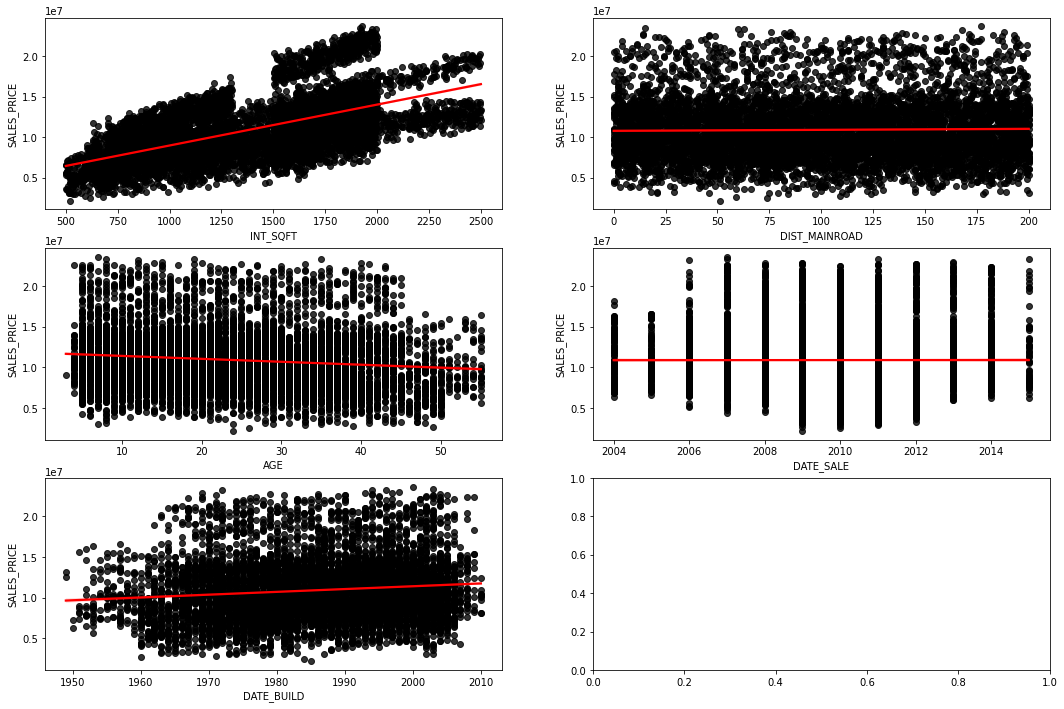

In [37]:
fig, axs = plt.subplots(3,2,figsize=(18,12))
columnsR=['INT_SQFT','DIST_MAINROAD','AGE','DATE_SALE','DATE_BUILD']
for col, ax in zip(columnsR,axs.flatten()):
  sns.regplot(x=df[col],y=df['SALES_PRICE'], ax=ax,scatter_kws={"color": "black"}, line_kws={"color": "red"})

We drop the DIST_MAINROAD column as it is not much related to slaes price.

In [38]:
df.drop('DIST_MAINROAD',axis=1,inplace=True)

We plot the correlation heatmap to visualize linear relation between features and the sales price.

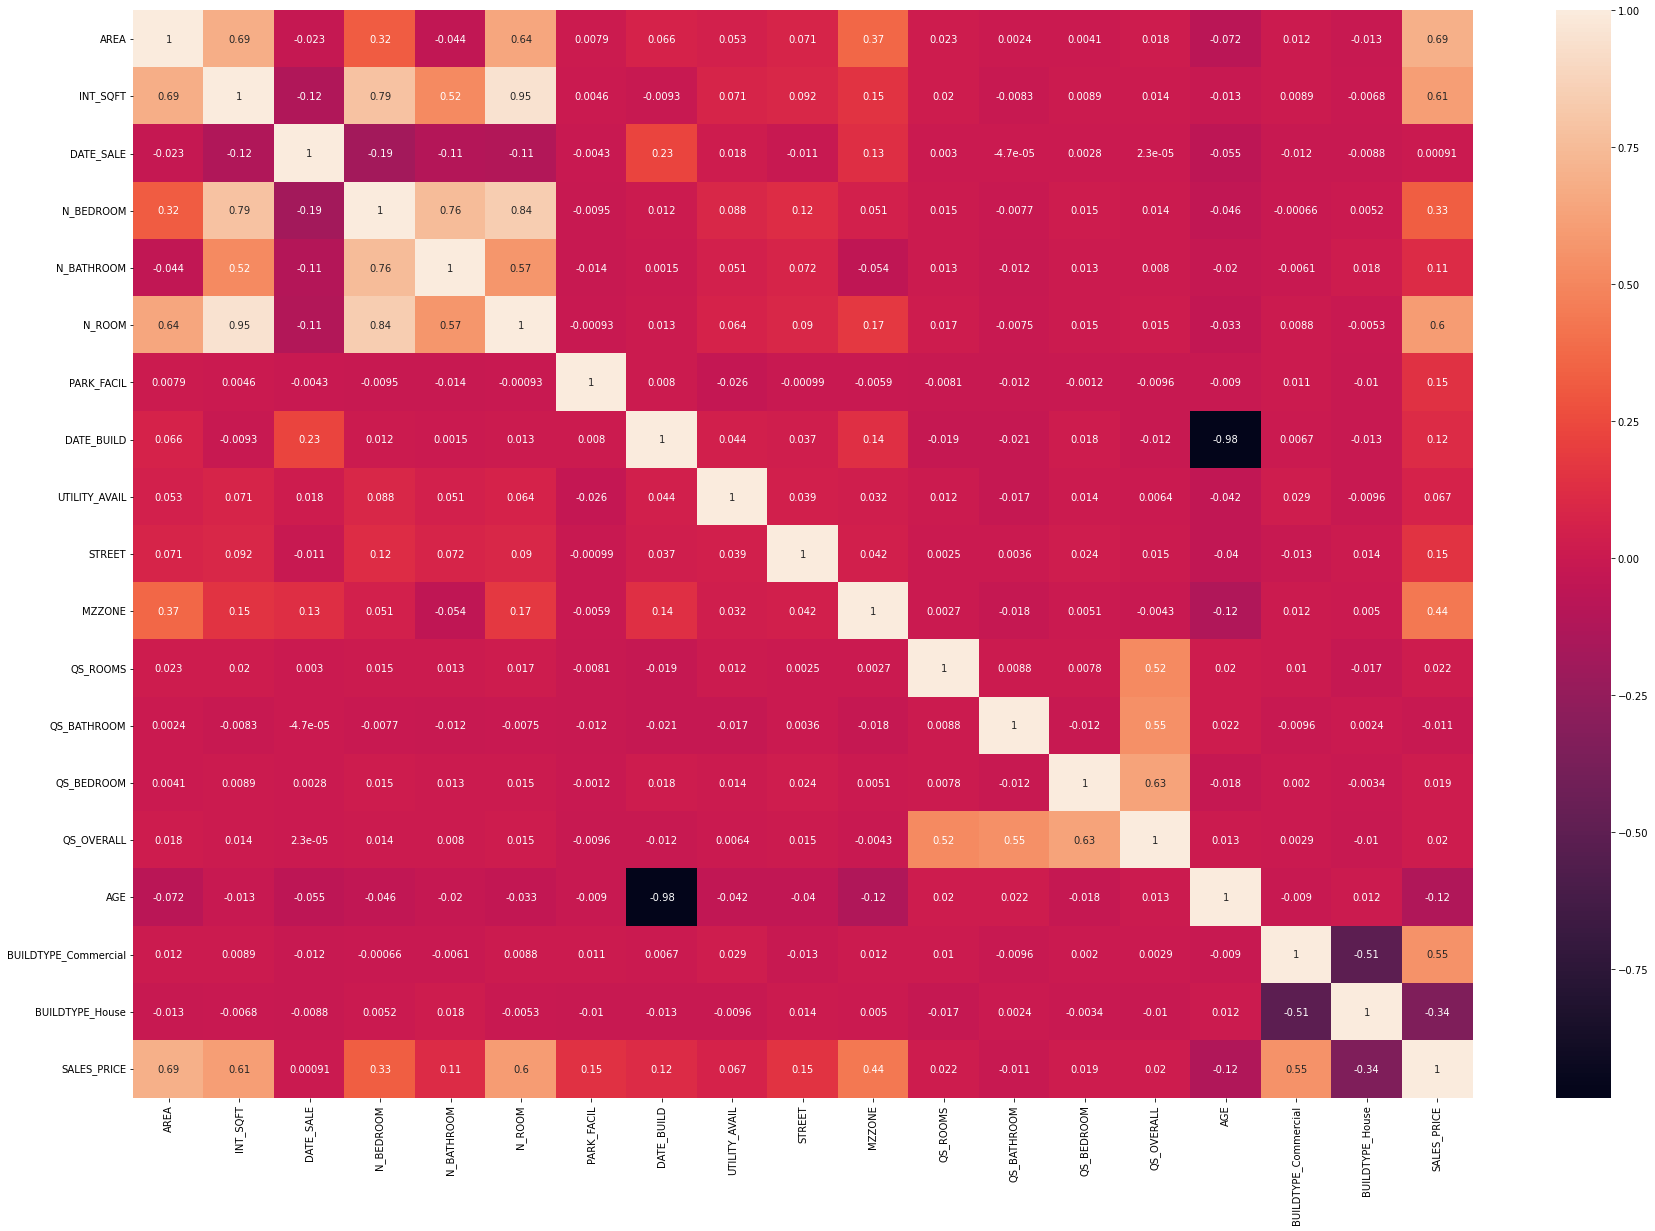

In [39]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

# Splitting the data

We split the data into Train and Test in the ratio of 3:7

In [40]:
from sklearn.model_selection import train_test_split
X=df[['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD']].values.reshape(-1,12)
Y=df['SALES_PRICE']
#X_val=df[['AGE']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

# Standardizing the Data

We standardize the numerical columns of the data using the Standard Scaler.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

X_trainP=pd.DataFrame(X_train,columns=['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD'])
X_trainP['INT_SQFT']=scaler.fit_transform(X_trainP['INT_SQFT'].values.reshape(-1,1))
X_trainP['AGE']=scaler.fit_transform(X_trainP['AGE'].values.reshape(-1,1))
X_trainP['DATE_BUILD']=scaler.fit_transform(X_trainP['DATE_BUILD'].values.reshape(-1,1))
X_testP=pd.DataFrame(X_test,columns=['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD'])
X_testP['INT_SQFT']=scaler.fit_transform(X_testP['INT_SQFT'].values.reshape(-1,1))
X_testP['AGE']=scaler.fit_transform(X_testP['AGE'].values.reshape(-1,1))
X_testP['DATE_BUILD']=scaler.fit_transform(X_testP['DATE_BUILD'].values.reshape(-1,1))

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

X_trainP=pd.DataFrame(X_train,columns=['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD'])

X_scale_intsqft=scaler.fit(X_trainP['INT_SQFT'].values.reshape(-1,1))
X_trainP['INT_SQFT']=X_scale_intsqft.transform(X_trainP['INT_SQFT'].values.reshape(-1,1))

X_scale_age=scaler.fit(X_trainP['AGE'].values.reshape(-1,1))
X_trainP['AGE']=X_scale_age.transform(X_trainP['AGE'].values.reshape(-1,1))

X_scale_db=scaler.fit(X_trainP['DATE_BUILD'].values.reshape(-1,1))
X_trainP['DATE_BUILD']=X_scale_db.transform(X_trainP['DATE_BUILD'].values.reshape(-1,1))

X_testP=pd.DataFrame(X_test,columns=['INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD'])
X_testP['INT_SQFT']=X_scale_intsqft.transform(X_testP['INT_SQFT'].values.reshape(-1,1))
X_testP['AGE']=X_scale_age.transform(X_testP['AGE'].values.reshape(-1,1))
X_testP['DATE_BUILD']=X_scale_db.transform(X_testP['DATE_BUILD'].values.reshape(-1,1))

In [42]:
X_test=X_testP.values.reshape(-1,12)
X_train=X_trainP.values.reshape(-1,12)


<br><br>

### We next fit different models to the data and try to find the model that gives thebest results.

#Linear Regression

In [43]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import r2_score

grad_Regressor=SGDRegressor()
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict=lin_reg.predict(X_test)
r2_score(y_test,y_predict)

0.9171267393276729

# Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

decsTree=DecisionTreeRegressor(max_depth=10)
decsTree.fit(X_train,y_train)
y_predi=decsTree.predict(X_test)
r2_score(y_test,y_predi)

0.9714008976089367

# XG Boost Regressor with 'gblinear' Booster

In [45]:
import xgboost as xgb
xgbRegL = xgb.XGBRegressor(booster='gblinear',verbosity=0)
xgbRegL.fit(X_train,y_train)
y_predit=xgbRegL.predict(X_test)
r2_score(y_test,y_predit)

0.6952031246405627

# XG Boost Regressor with 'gbtreee' Booster

In [46]:
import xgboost as xgb
xgbRegT = xgb.XGBRegressor(booster='gbtree',verbosity=0)
xgbRegT.fit(X_train,y_train)
y_predit=xgbRegT.predict(X_test)
r2_score(y_test,y_predit)

0.9883915517821354

#K_Nearest Neighbors (K=3)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

knnMod=KNeighborsRegressor(n_neighbors=3)
knnMod.fit(X_train,y_train)
y_predt=knnMod.predict(X_test)
r2_score(y_test,y_predt)

0.9260530596786438

### We now perform a K-Fold cross validation with the XGB regressor with 'gbtree' booster since it has given the highest r2 score.

In [48]:
from sklearn.model_selection import KFold , cross_val_score

cv = KFold(n_splits=10)

res=cross_val_score(xgbRegT,X=X,y=Y, scoring='r2',cv=cv)
res.mean()

0.9890492755117386

###We observe that the R2 score is almost <b>0.99</b>

<br>

### We will now save our models as a Pickle file so that it can be used to predict the house price anytime without having to fit the data to the model everytime

In [49]:
xgbRegModl=xgb.XGBRegressor(booster='gbtree',verbosity=0)
xgbRegModl.fit(X,Y)

XGBRegressor(verbosity=0)

In [50]:
import pickle

with open('XGBoostTreeModel','wb') as PWfile:
  pickle.dump(xgbRegModl,PWfile)

# House Price Prediction using the saved model.

### The below piece of code gets the necessary input to predict the Range of price of a house. The range is derived from the formula for R2 score. Since the R2 score we got for the best model was <b>0.99</b> which means that the error is <b>0.01</b>. 

<br>

The user has to enter the feature values as expected by the code. i.e: When entering the value for Build Type the user should enter "House" and not "house".
In such cases when the entered value deviates from the expected input the code will take the default value

In [51]:
from math import floor,ceil

with open('XGBoostTreeModel','rb') as PRfile:
  model = pickle.load(PRfile)

def PredictPriceRange(features):
  params=np.array(features,ndmin=2)
  pred_value=model.predict(params)

  R = ((pred_value**2)*0.01)**(0.5)
  Pred_min=int(floor((pred_value-R)/100000))
  Pred_max=int(ceil((pred_value+R)/100000))
  result = (Pred_max,Pred_min)
  return result

'INT_SQFT','N_ROOM','BUILDTYPE_Commercial','BUILDTYPE_House','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','AGE','UTILITY_AVAIL','DATE_BUILD'

features = []

isStart = input(" Welcome to Chennai House Price Predictor \n  To start finding the price, type 'Start' and hit Enter:  ")
if isStart.lower() == "start":
    sqft = input("Enter the approx. desired Area:  ")
    rooms = input("Enter the number of Total Rooms:  ")
    roomsB = input("Enter the number of Bedrooms:  ")
    buildType = input("Enter the build type (House/Commercial/Other <default> ):  ")
    area = input("Enter the nearest location from this list (Chrompet / KK Nagar / Karapakkam / Anna Nagar / Velachery / Adyar / T Nagar <default> ):  ")
    park = input("Does the building have Parking Facility: (Yes / No <default> ) ")
    street = input("Enter the type of Street (Gravel <default> / Paved / No Access)")
    mzZone = input("Enter the Metro  zone from the List (RL / RH / RM / C / A / I <default> ):  ")
    age = input("Enter the age of the building in years:  ")
    util = input("Does the building have Utilities. Chose from list ( All Pub <default> / ELO / No Sewr )")
    built_year = input("Enter the Year house was built:  ")

try:

    features.append(int(sqft))

    features.append(int(rooms))

    if buildType.strip().lower() == "house":
        features.append(0)
        features.append(1)
    elif buildType.strip().lower() == "commercial":
        features.append(1)
        features.append(0)
    else:
        features.append(0)
        features.append(0)

    features.append(area_val.get(area,6))

    features.append(int(roomsB))

    features.append(park_val.get(park,0))

    features.append(street_val.get(street,2))
    
    features.append(mzzone_val.get(mzZone,6))

    features.append(int(age))

    features.append(util_val.get(util,0))
    
    features.append(int(built_year))


    result = PredictPriceRange(features)

    print("The price of the house with the specification ypu have provided will be in the range of Rs.{}L/- to Rs.{}L/-".format(result[1], result[0]))

except:
    print("Incorrect Entries")

 Welcome to Chennai House Price Predictor 
  To start finding the price, type 'Start' and hit Enter:  
Incorrect Entries


I entered the data from the first row shown below. We can see that the predicted output received gives a range that closely encloses the Actual House Sales Price.

In [52]:
df.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,SALES_PRICE
PRT_ID,,,,,,,,,,,,,,,,,,,
P03210,0,1004,2011,1,1,3,1,1967,2,1,0,4.0,3.9,4.9,4.330,44,1,0,7600000
P09411,5,1986,2006,2,1,5,0,1995,2,2,4,4.9,4.2,2.5,3.765,11,1,0,21717770
P01812,1,909,2012,1,1,3,1,1992,0,2,5,4.1,3.8,2.2,3.090,20,1,0,13159200
P05346,3,1855,2010,3,2,5,0,1988,1,1,2,4.7,3.9,3.6,4.010,22,0,0,9630290
P06210,0,1226,2009,1,1,3,1,1979,2,2,1,3.0,2.5,4.1,3.290,30,0,0,7406250
